<a href="https://colab.research.google.com/github/purushoth46/TNSDC-GENAI/blob/main/handwriitendigitregonition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
938/938 [==============================] - 35s 37ms/step - loss: 0.1813 - accuracy: 0.9448 - val_loss: 0.0442 - val_accuracy: 0.9868
Epoch 2/5
938/938 [==============================] - 33s 36ms/step - loss: 0.0497 - accuracy: 0.9845 - val_loss: 0.0323 - val_accuracy: 0.9890
Epoch 3/5
938/938 [==============================] - 33s 36ms/step - loss: 0.0365 - accuracy: 0.9883 - val_loss: 0.0342 - val_accuracy: 0.9889
Epoch 4/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.0293 - val_accuracy: 0.9911
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0270 - accuracy: 0.9907
Test accuracy: 0.9907000064849854


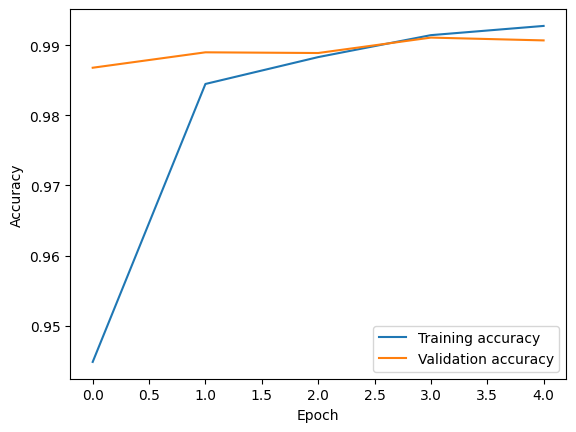

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
